In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df.shape

(891, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## Data Description

- Survival : 0 = No, 1 = Yes
- pclass(Ticket Class) : 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex(Gender) : Male, Female
- Age : Age in years
- SibSp : Number of siblings/spouses abroad the titanic
- Parch : Number of parents/children abrod the titanic
- Ticket : Ticket Number
- Fare : Passenger fare
- Cabin : Cabin Number
- Embarked : Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

# Q1: Print first and last rows from the dataset

In [8]:
first_column= df.iloc[:, 0]
last_column = df.iloc[: , -1]
first_column, last_column

(0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: survived, Length: 891, dtype: int64,
 0      False
 1      False
 2       True
 3      False
 4       True
        ...  
 886     True
 887     True
 888    False
 889     True
 890     True
 Name: alone, Length: 891, dtype: bool)

# Q2: Select only survived people

In [13]:
survived = df[df['survived'] != 0]
survived


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


# Q3: Select sex, fare, survived columns

In [15]:
df[['sex','fare','survived']]

,sex,fare,survived
0,male,7.2500,0
1,female,71.2833,1
2,female,7.9250,1
3,female,53.1000,1
4,male,8.0500,0
...,...,...,...
886,male,13.0000,0
887,female,30.0000,1
888,female,23.4500,0
889,male,30.0000,1


# Q4: Add a new_column to a DataFrame that combines class and embark_town

In [19]:
df['new_column'] =df['class'].astype(str) +" "+ df['embark_town']
df['new_column']

0       Third Southampton
1         First Cherbourg
2       Third Southampton
3       First Southampton
4       Third Southampton
              ...        
886    Second Southampton
887     First Southampton
888     Third Southampton
889       First Cherbourg
890      Third Queenstown
Name: new_column, Length: 891, dtype: object

In [30]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_column
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Third Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,First Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Third Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,First Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Third Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Second Southampton
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,First Southampton
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Third Southampton
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,First Cherbourg


# Q5: Remove new_column from the DataFrame

In [ ]:
df.drop(['new_column'])

# Q6: Filter DataFrame for rows of survived Males only 

In [32]:
x = df[(df['survived']==1) & (df['sex']=='male')]
x


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_column
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,Second Southampton
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True,Second Southampton
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True,First Southampton
36,1,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,yes,True,Third Cherbourg
55,1,1,male,NaN,0,0,35.5000,S,First,man,True,C,Southampton,yes,True,First Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,1,3,male,32.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True,Third Southampton
839,1,1,male,NaN,0,0,29.7000,C,First,man,True,C,Cherbourg,yes,True,First Cherbourg
857,1,1,male,51.0,0,0,26.5500,S,First,man,True,E,Southampton,yes,True,First Southampton
869,1,3,male,4.0,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False,Third Southampton


# Q7: The total number of males who survived 

In [40]:
df['survived'].sum()

342

# Q8: How many values in each class?

In [42]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

# Import Seaborn

In [43]:
import seaborn as sns

# Q9: Draw barplot represents survived people based on sex

<AxesSubplot:xlabel='sex', ylabel='survived'>

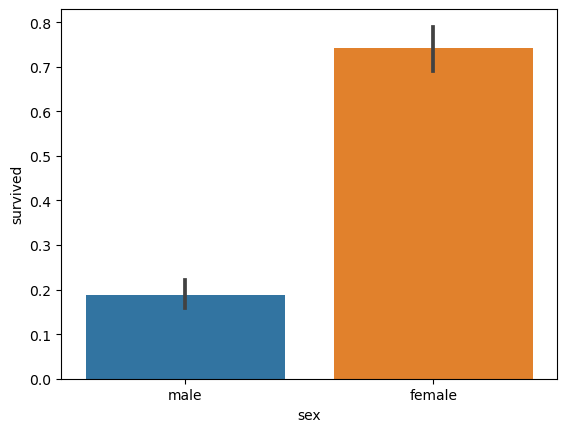

In [46]:
sns.barplot(data=df, x='sex', y='survived')

# Q10: Draw catplot represents survived people based on embarked

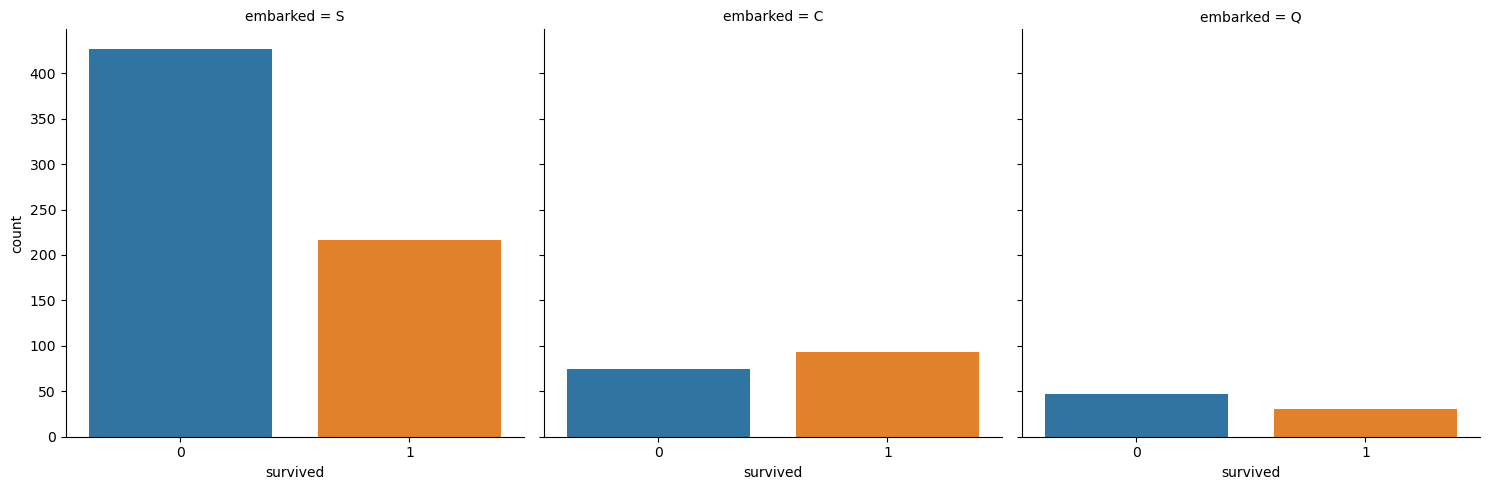

In [47]:
sns.catplot(df,x='survived',col='embarked',kind='count')

# Q11: Draw boxplot represents distribution of male and female based on age and pclass

<AxesSubplot:xlabel='sex', ylabel='age'>

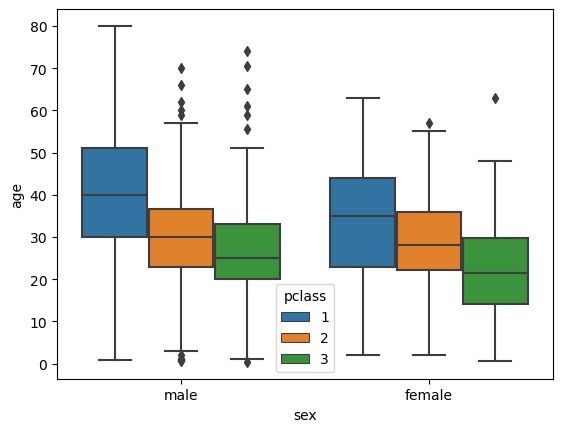

In [50]:
plt.f
sns.boxplot(data=df, y='age', x='sex', hue='pclass' )

# Q12: Draw heatmap represents correlations between sibsp, parch, age, fare, and survived columns

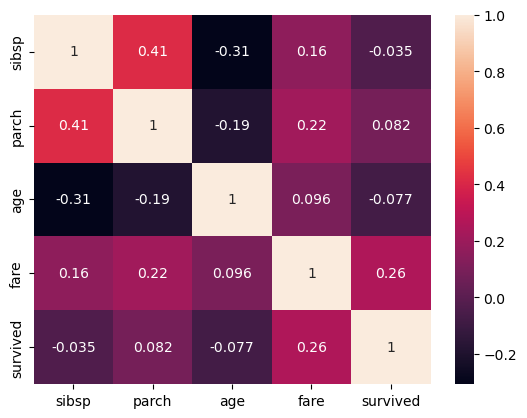

In [56]:
y = df[['sibsp','parch', 'age', 'fare','survived']].corr()
ax = sns.heatmap(y, annot= True)


# Q13: Draw factorplot represents the relation between sibsp and survived columns

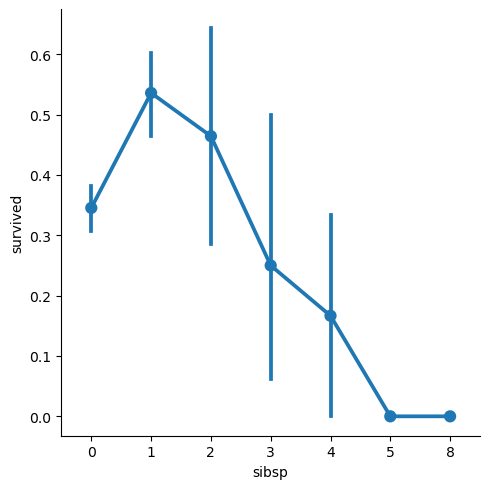

In [59]:
sns.catplot(x ='sibsp', y ='survived', data = df, kind='point')


# Q14: Draw extra insights [Optional]